In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fever=pd.read_csv('Fever.csv')
fever.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [79]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null category
Relief       36 non-null float64
dtypes: category(3), float64(1)
memory usage: 924.0 bytes


In [80]:
fever.shape

(36, 4)

In [81]:
fever.describe()

Relief
count  36.000000
mean    7.183333
std     3.272090
min     2.300000
25%     4.675000
50%     6.000000
75%     9.325000
max    13.500000

In [3]:

fever.A=pd.Categorical(fever.A)
fever.A

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
Name: A, dtype: category
Categories (3, int64): [1, 2, 3]

In [5]:
fever.B=pd.Categorical(fever.B)
fever.B

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     3
9     3
10    3
11    3
12    1
13    1
14    1
15    1
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    3
24    1
25    1
26    1
27    1
28    2
29    2
30    2
31    2
32    3
33    3
34    3
35    3
Name: B, dtype: category
Categories (3, int64): [1, 2, 3]

In [6]:
fever.Volunteer=pd.Categorical(fever.Volunteer)
fever.Volunteer

0     1
1     2
2     3
3     4
4     1
5     2
6     3
7     4
8     1
9     2
10    3
11    4
12    1
13    2
14    3
15    4
16    1
17    2
18    3
19    4
20    1
21    2
22    3
23    4
24    1
25    2
26    3
27    4
28    1
29    2
30    3
31    4
32    1
33    2
34    3
35    4
Name: Volunteer, dtype: category
Categories (4, int64): [1, 2, 3, 4]

Variable A
**Null Hypothesis  𝐻0  : The mean Relief hours for the Hay fever are same between all the volunteers**

**Alternate Hypothesis  𝐻𝐴  : The mean Relief hours for the hay fever is different for atleast one of the Volunteer**

In [8]:
# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.
formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)


            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


**conclusion is the p value is less than the 5% signaficant value so rejecting the null hypothesis for Active ingridient A**

In [9]:
# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.
formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)



            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


**conclusion is the p value is less than the 5% signaficant value so rejecting the null hypothesis for Active ingridient B**

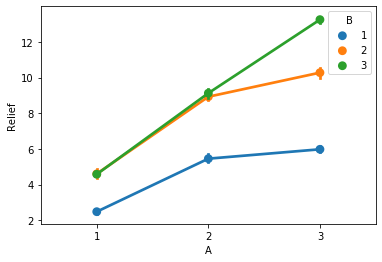

In [82]:
# 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
# What is an interaction between two treatments?
sns.pointplot(x='A',y='Relief',hue='B',data=fever)


In [11]:
# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.
formula = 'Relief ~ C(A)+C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


In [85]:
# Problem 2:
edu=pd.read_csv('Education+-+Post+12th+Standard.csv')
edu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [13]:
edu.shape


(777, 18)

In [14]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [15]:
edu.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [16]:
edu.duplicated().sum()

0

In [17]:
edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

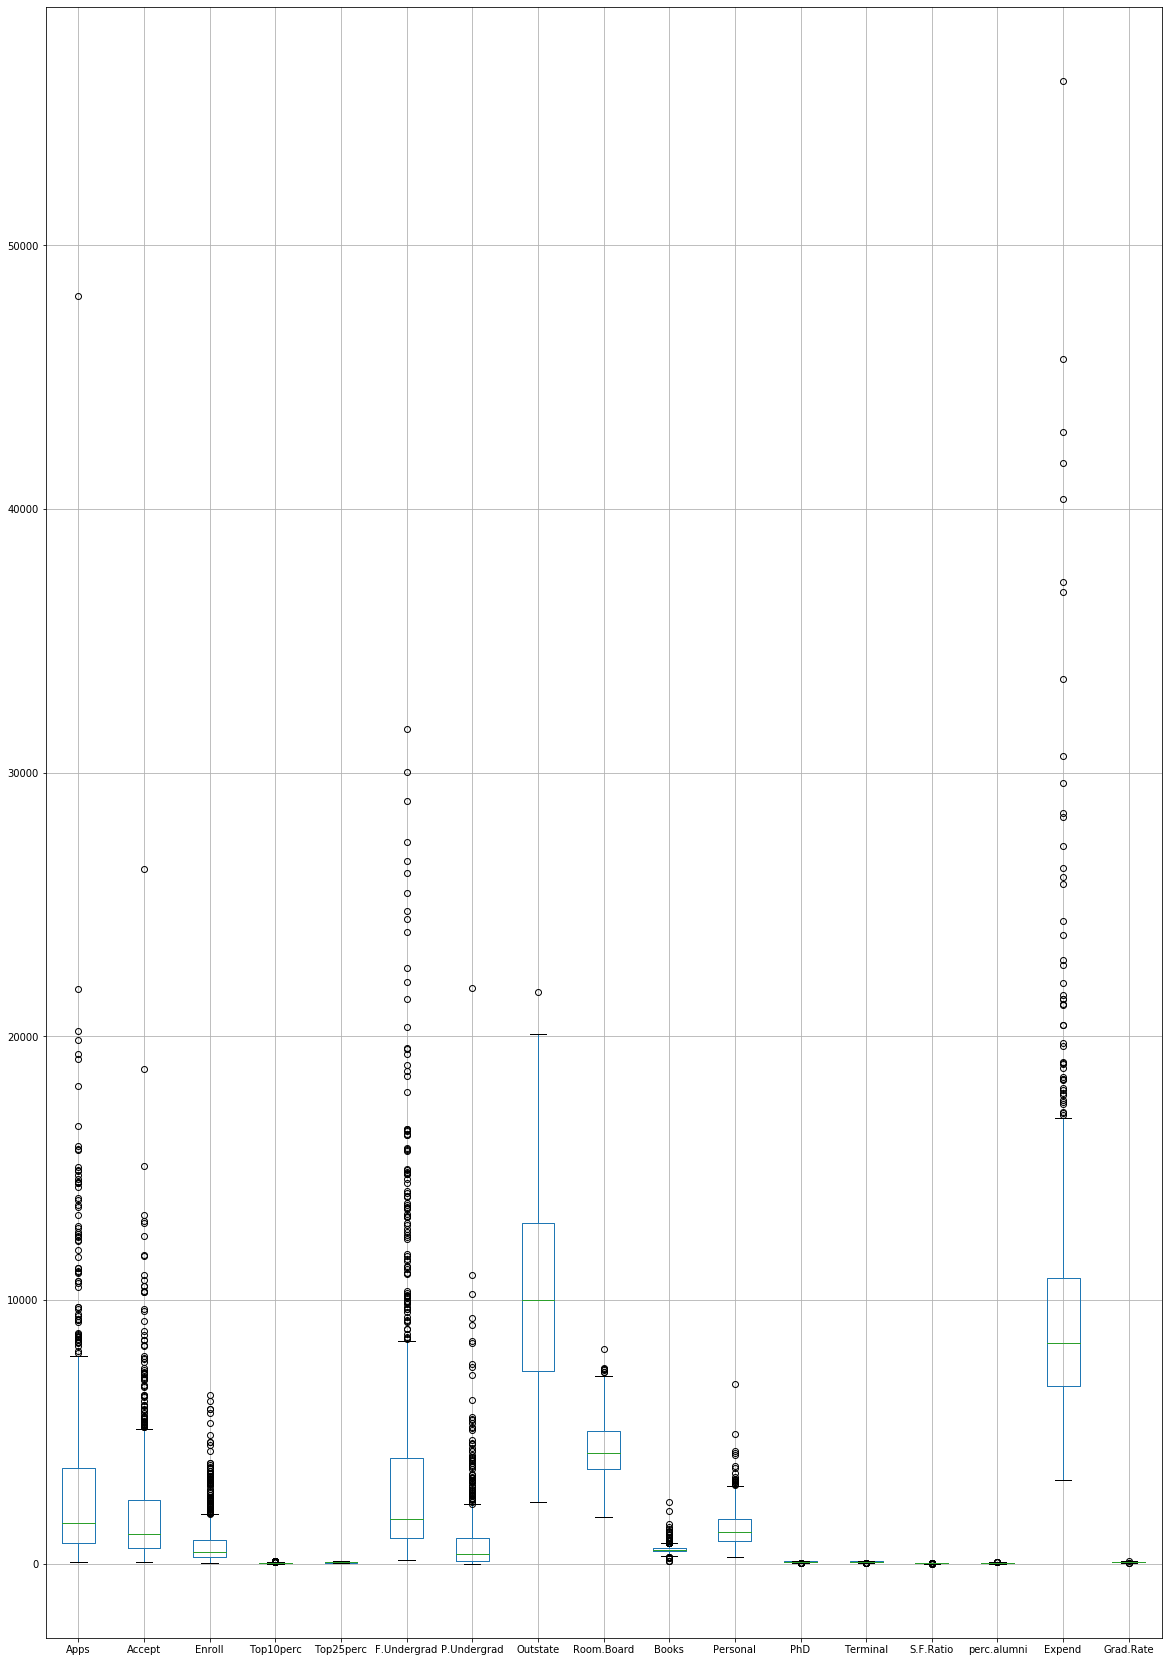

In [18]:
edu.boxplot(figsize=(20,30))

In [19]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
colArr=edu.columns.values
# print(edu[colArr[17]])
for i in range(1,edu.columns.size):
#     print(i)
#     edu[colArr[i]]
    lower,upper=treat_outlier(edu[colArr[i]])
    edu[colArr[i]]=np.where(edu[colArr[i]]>upper,upper,edu[colArr[i]])
    edu[colArr[i]]=np.where(edu[colArr[i]]<lower,lower,edu[colArr[i]])



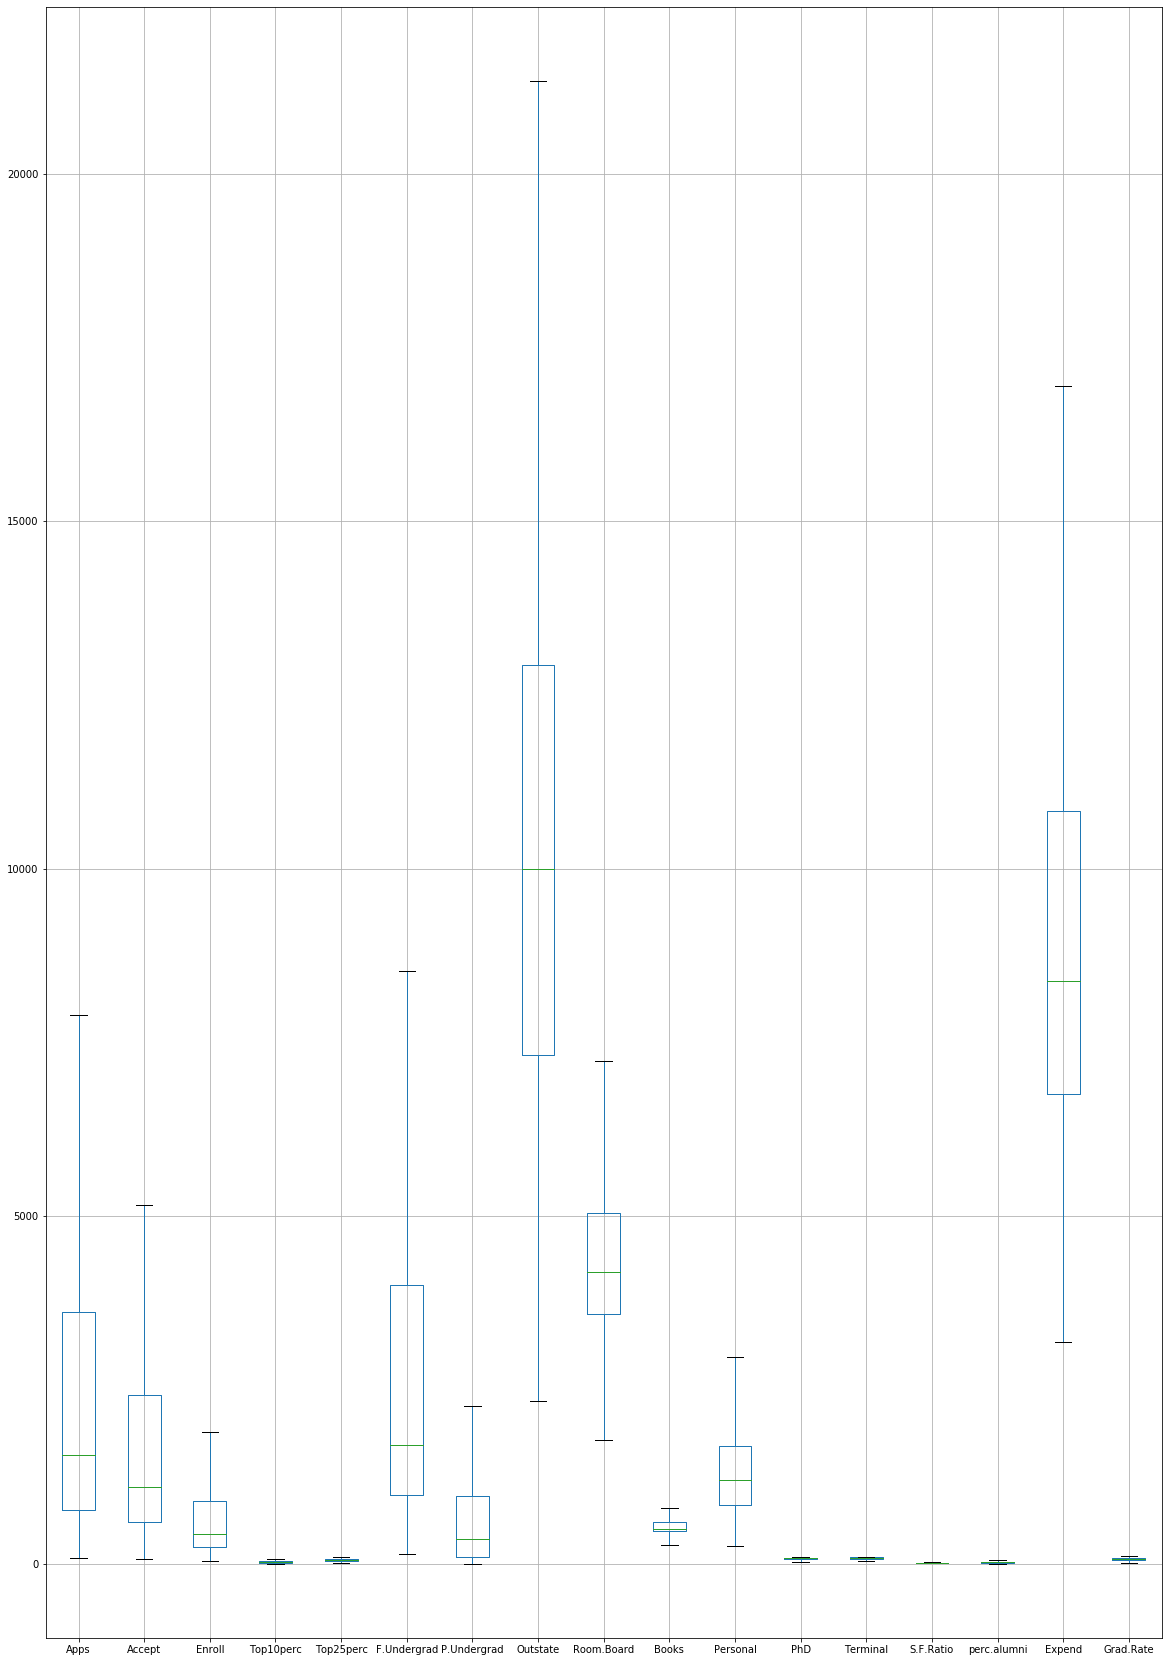

In [21]:
edu.boxplot(figsize=(20,30))

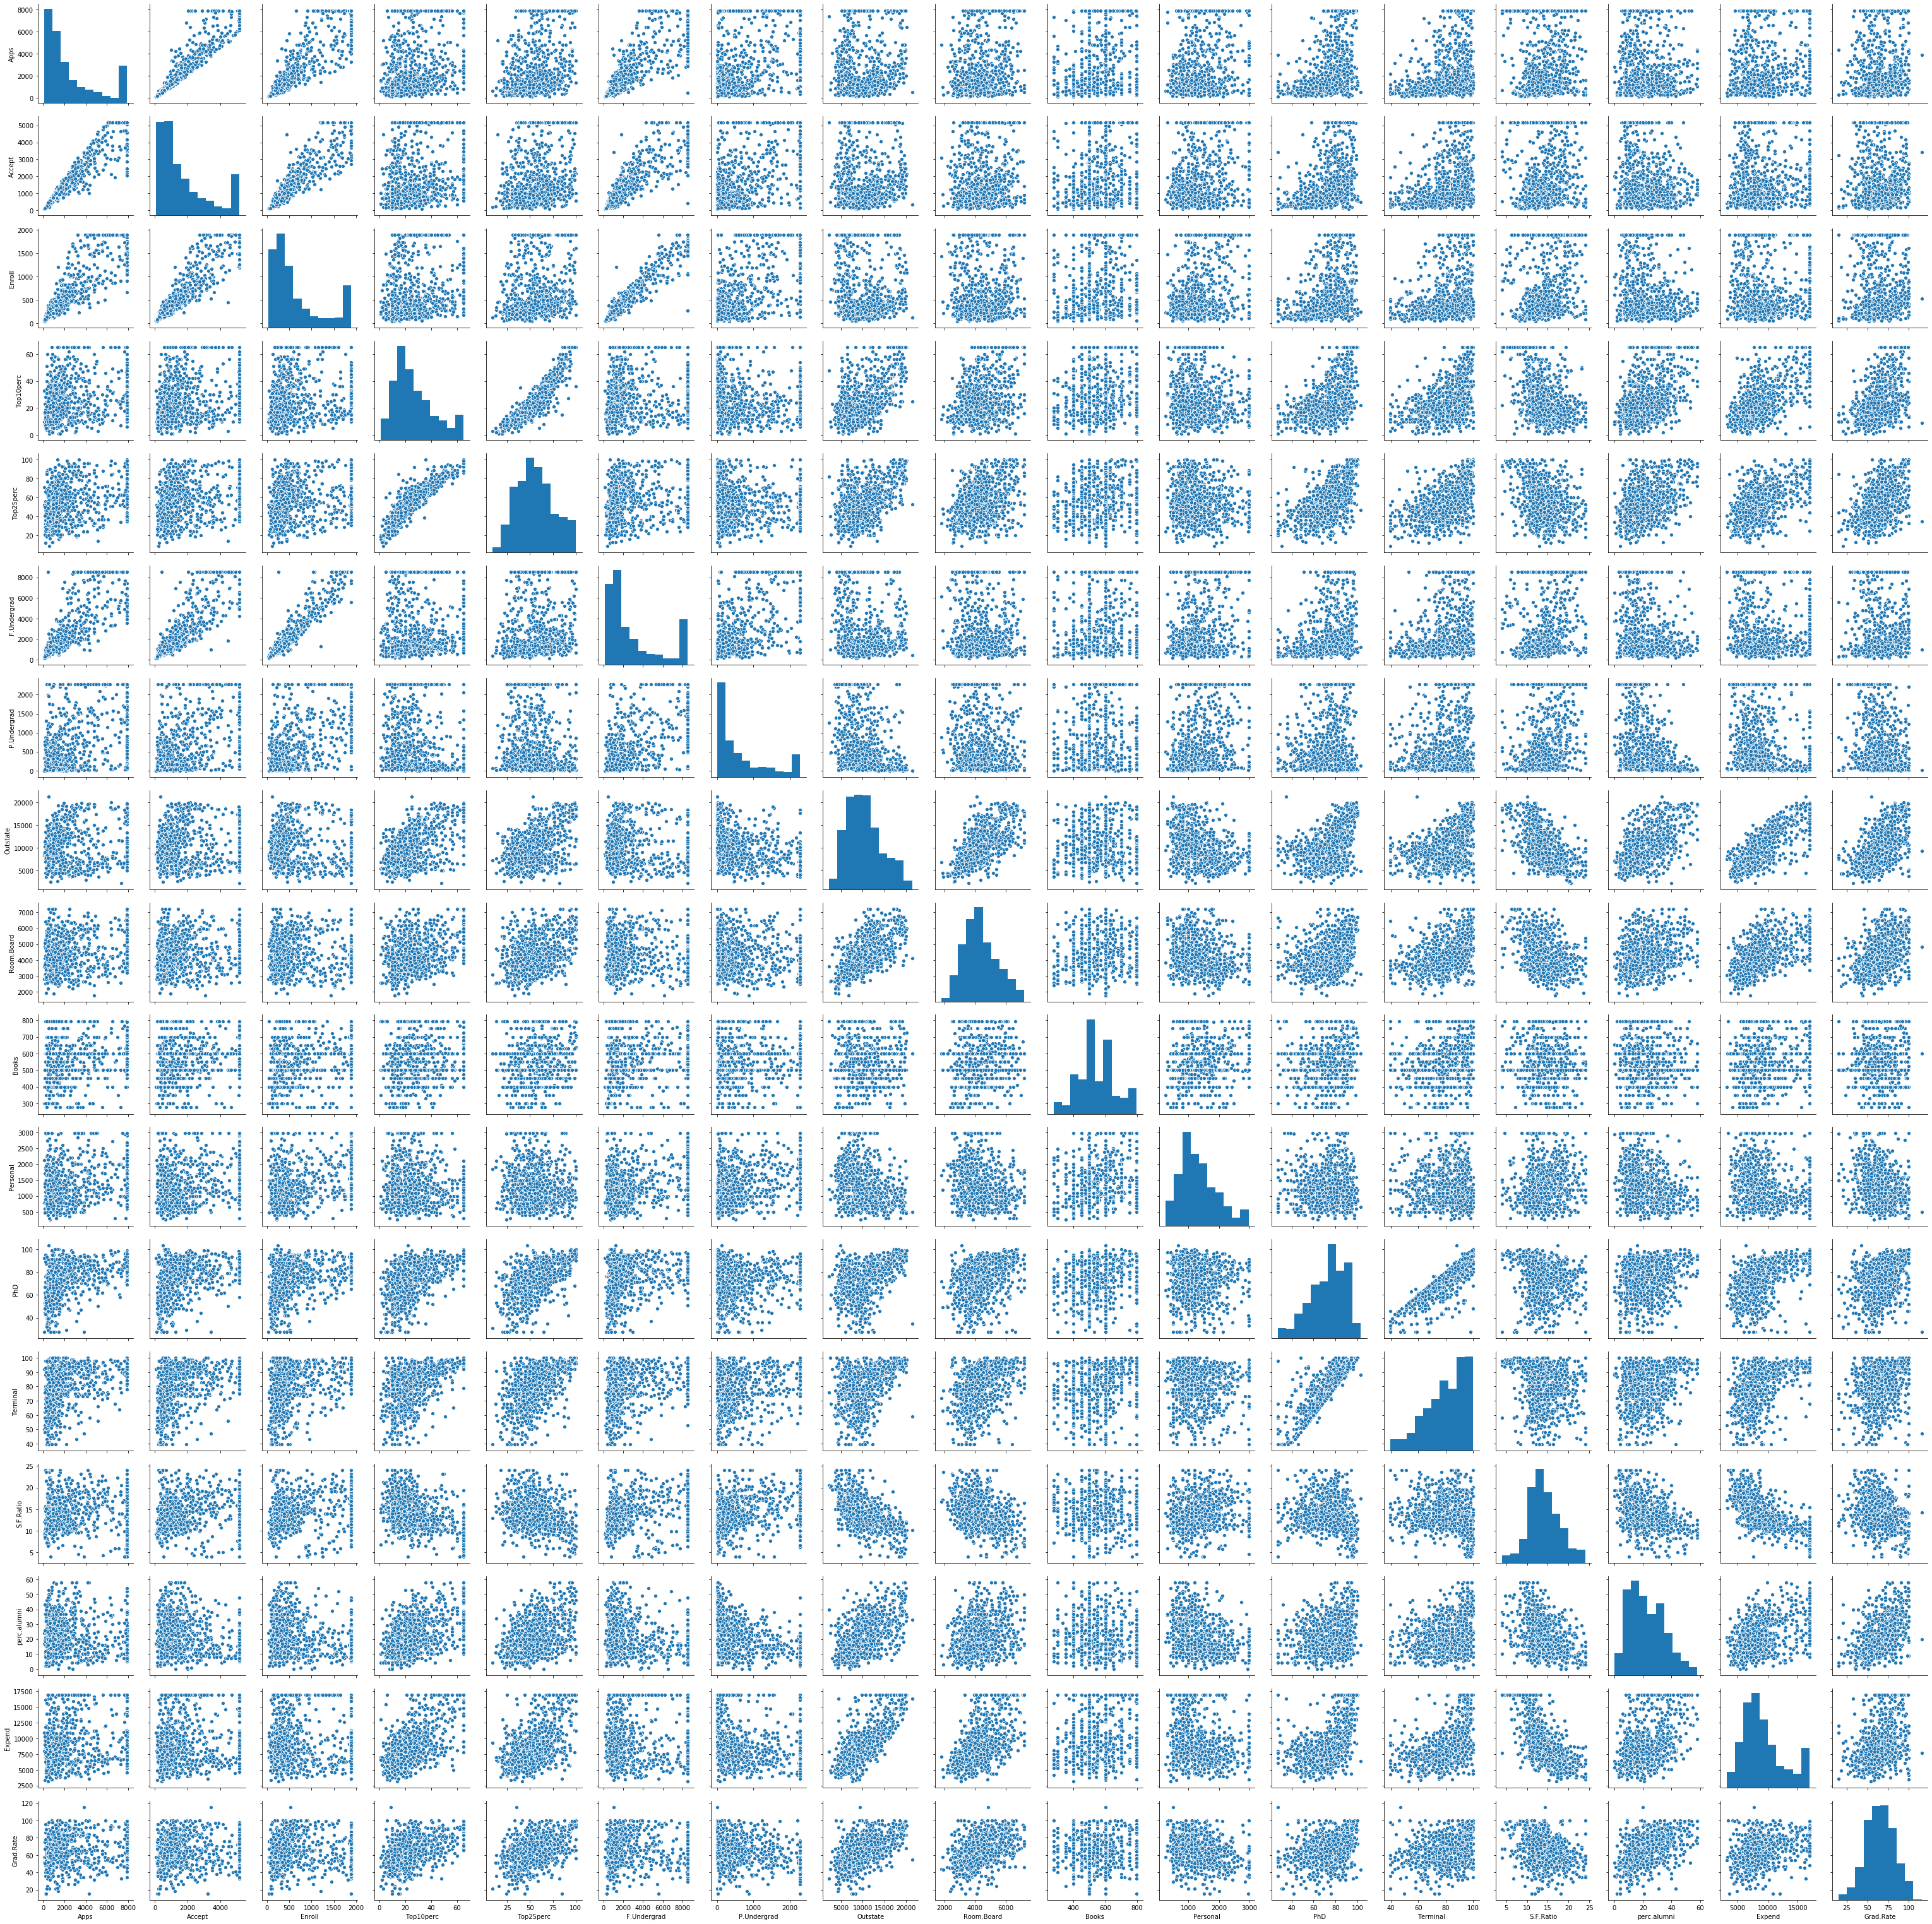

In [24]:
# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.
sns.pairplot(edu)

In [25]:
edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

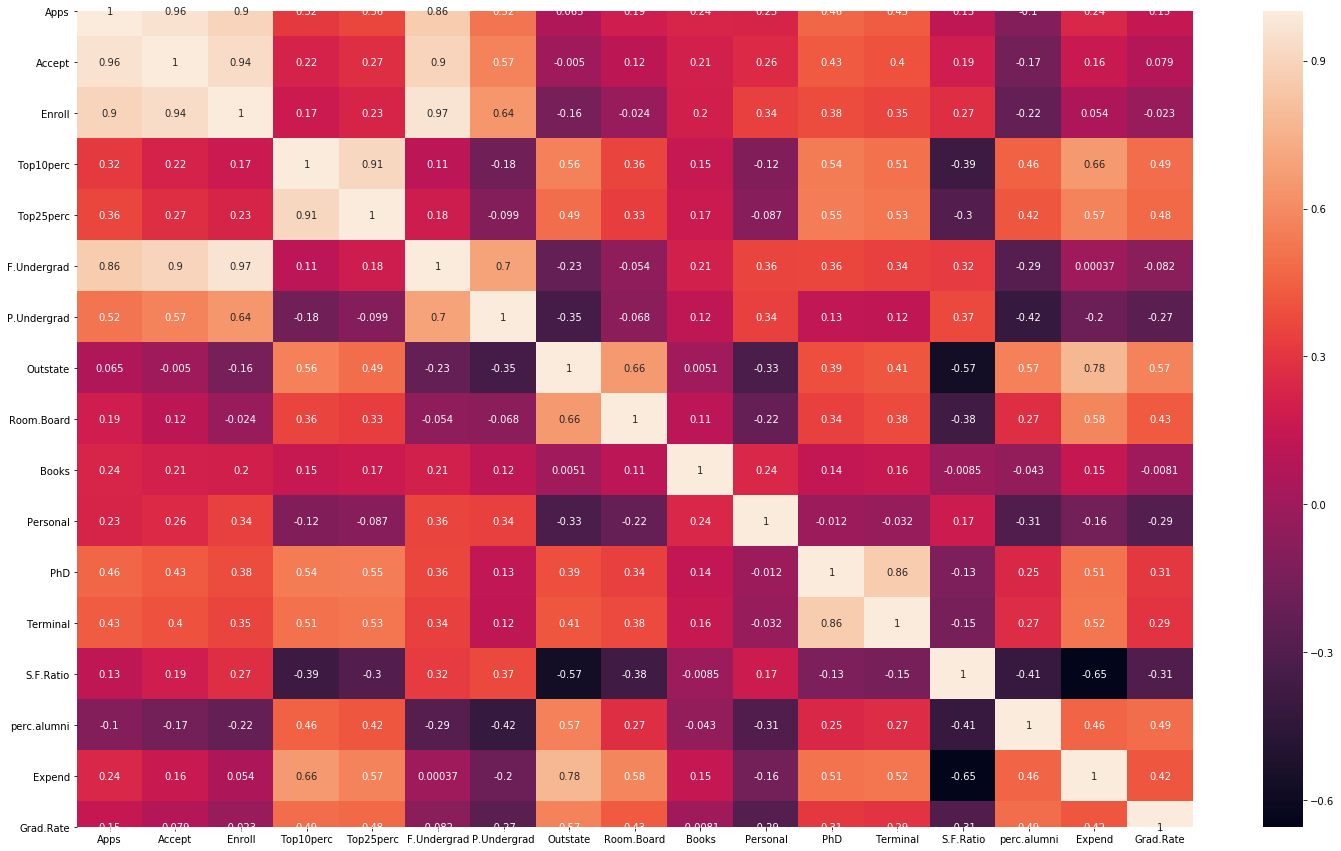

In [29]:
plt.figure(figsize=(25,15))
sns.heatmap(edu.corr(),annot=True,)

In [86]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
edu.head(10)

Names    Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660.0  1232.0   721.0       23.0       52.0   
1            Adelphi University  2186.0  1924.0   512.0       16.0       29.0   
2                Adrian College  1428.0  1097.0   336.0       22.0       50.0   
3           Agnes Scott College   417.0   349.0   137.0       60.0       89.0   
4     Alaska Pacific University   193.0   146.0    55.0       16.0       44.0   
5             Albertson College   587.0   479.0   158.0       38.0       62.0   
6       Albertus Magnus College   353.0   340.0   103.0       17.0       45.0   
7                Albion College  1899.0  1720.0   489.0       37.0       68.0   
8              Albright College  1038.0   839.0   227.0       30.0       63.0   
9     Alderson-Broaddus College   582.0   498.0   172.0       21.0       44.0   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
0       2885.0        537.0    7440.0      3300.0  450.0    2200.0  70.0   
1       2683.0       1227.0   12280.0      6450.0  750.0    1500.0  29.0   
2       1036.0         99.0   11250.0      3750.0  400.0    1165.0  53.0   
3        510.0         63.0   12960.0      5450.0  450.0     875.0  92.0   
4        249.0        869.0    7560.0      4120.0  795.0    1500.0  76.0   
5        678.0         41.0   13500.0      3335.0  500.0     675.0  67.0   
6        416.0        230.0   13290.0      5720.0  500.0    1500.0  90.0   
7       1594.0         32.0   13868.0      4826.0  450.0     850.0  89.0   
8        973.0        306.0   15595.0      4400.0  300.0     500.0  79.0   
9        799.0         78.0   10468.0      3380.0  660.0    1800.0  40.0   

   Terminal  S.F.Ratio  perc.alumni   Expend  Grad.Rate  
0      78.0       18.1         12.0   7041.0       60.0  
1      39.5       12.2         16.0  10527.0       56.0  
2      66.0       12.9         30.0   8735.0       54.0  
3      97.0        7.7         37.0  16948.5       59.0  
4      72.0       11.9          2.0  10922.0       15.5  
5      73.0        9.4         11.0   9727.0       55.0  
6      93.0       11.5         26.0   8861.0       63.0  
7     100.0       13.7         37.0  11487.0       73.0  
8      84.0       11.3         23.0  11644.0       80.0  
9      41.0       11.5         15.0   8991.0       52.0

In [87]:
edu['Apps'] = std_scale.fit_transform(edu[['Apps']])
edu['Accept'] = std_scale.fit_transform(edu[['Accept']])
edu['Enroll'] = std_scale.fit_transform(edu[['Enroll']])
edu['F.Undergrad'] = std_scale.fit_transform(edu[['F.Undergrad']])
edu['P.Undergrad']= std_scale.fit_transform(edu[['P.Undergrad']])
edu['Grad.Rate']= std_scale.fit_transform(edu[['Grad.Rate']])

In [40]:
edu.head(10)

Names      Apps    Accept    Enroll  Top10perc  \
0  Abilene Christian University -0.346882 -0.321205 -0.063509         23   
1            Adelphi University -0.210884 -0.038703 -0.288584         16   
2                Adrian College -0.406866 -0.376318 -0.478121         22   
3           Agnes Scott College -0.668261 -0.681682 -0.692427         60   
4     Alaska Pacific University -0.726176 -0.764555 -0.780735         16   
5             Albertson College -0.624307 -0.628611 -0.669812         38   
6       Albertus Magnus College -0.684808 -0.685356 -0.729043         17   
7                Albion College -0.285088 -0.121984 -0.313353         37   
8              Albright College -0.507700 -0.481644 -0.595505         30   
9     Alderson-Broaddus College -0.625600 -0.620854 -0.654735         21   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52    -0.168116    -0.209207      7440        3300    450      2200   
1         29    -0.209788     0.244307     12280        6450    750      1500   
2         50    -0.549565    -0.497090     11250        3750    400      1165   
3         89    -0.658079    -0.520752     12960        5450    450       875   
4         44    -0.711924     0.009005      7560        4120    800      1500   
5         62    -0.623421    -0.535212     13500        3335    500       675   
6         45    -0.677472    -0.410988     13290        5720    500      1500   
7         68    -0.434450    -0.541127     13868        4826    450       850   
8         63    -0.562562    -0.361036     15595        4400    300       500   
9         44    -0.598459    -0.510893     10468        3380    660      1800   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041  -0.318252  
1   29        30       12.2           16   10527  -0.551262  
2   53        66       12.9           30    8735  -0.667767  
3   92        97        7.7           37   19016  -0.376504  
4   76        72       11.9            2   10922  -2.939613  
5   67        73        9.4           11    9727  -0.609514  
6   90        93       11.5           26    8861  -0.143495  
7   89       100       13.7           37   11487   0.439030  
8   79        84       11.3           23   11644   0.846798  
9   40        41       11.5           15    8991  -0.784272

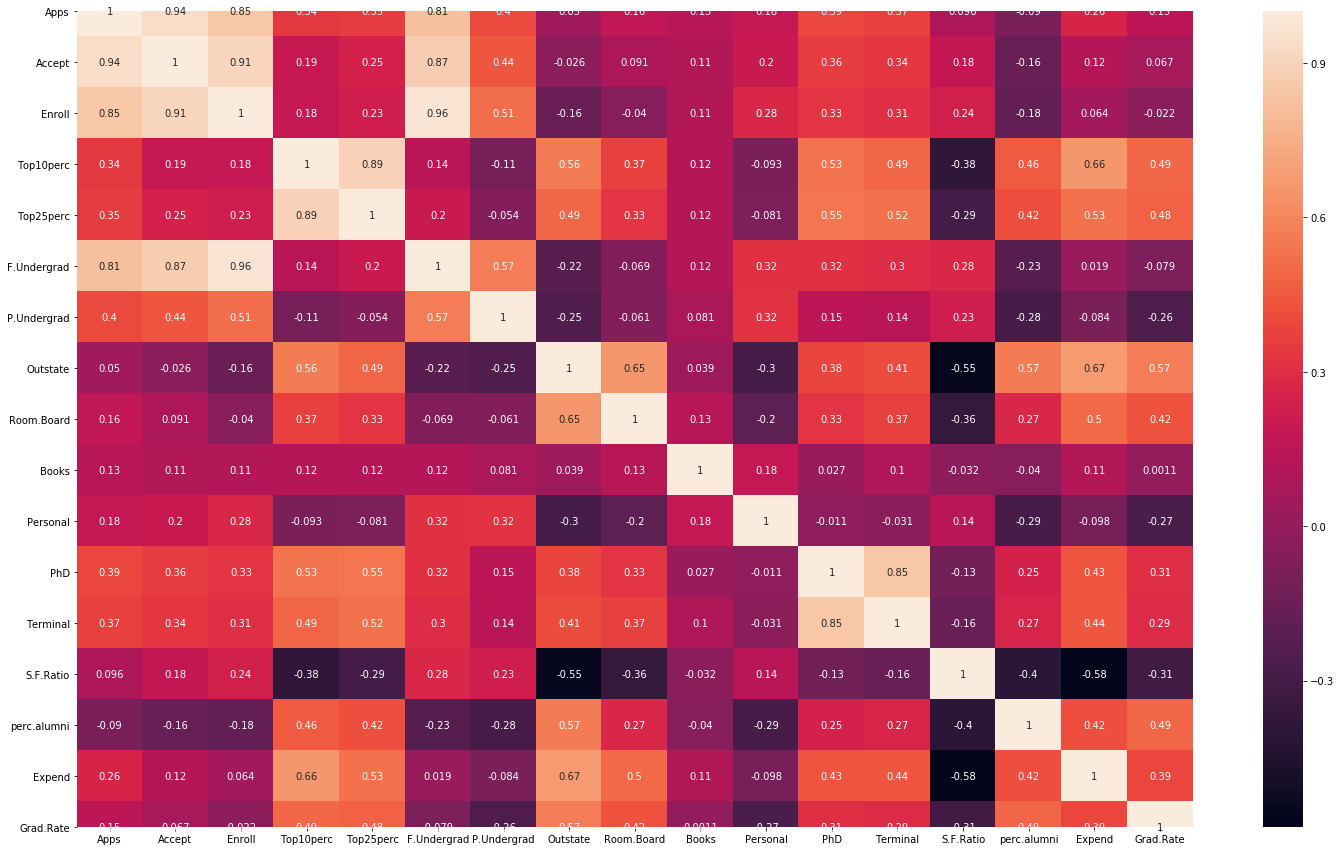

In [88]:
plt.figure(figsize=(25,15))
sns.heatmap(edu.corr(),annot=True,)

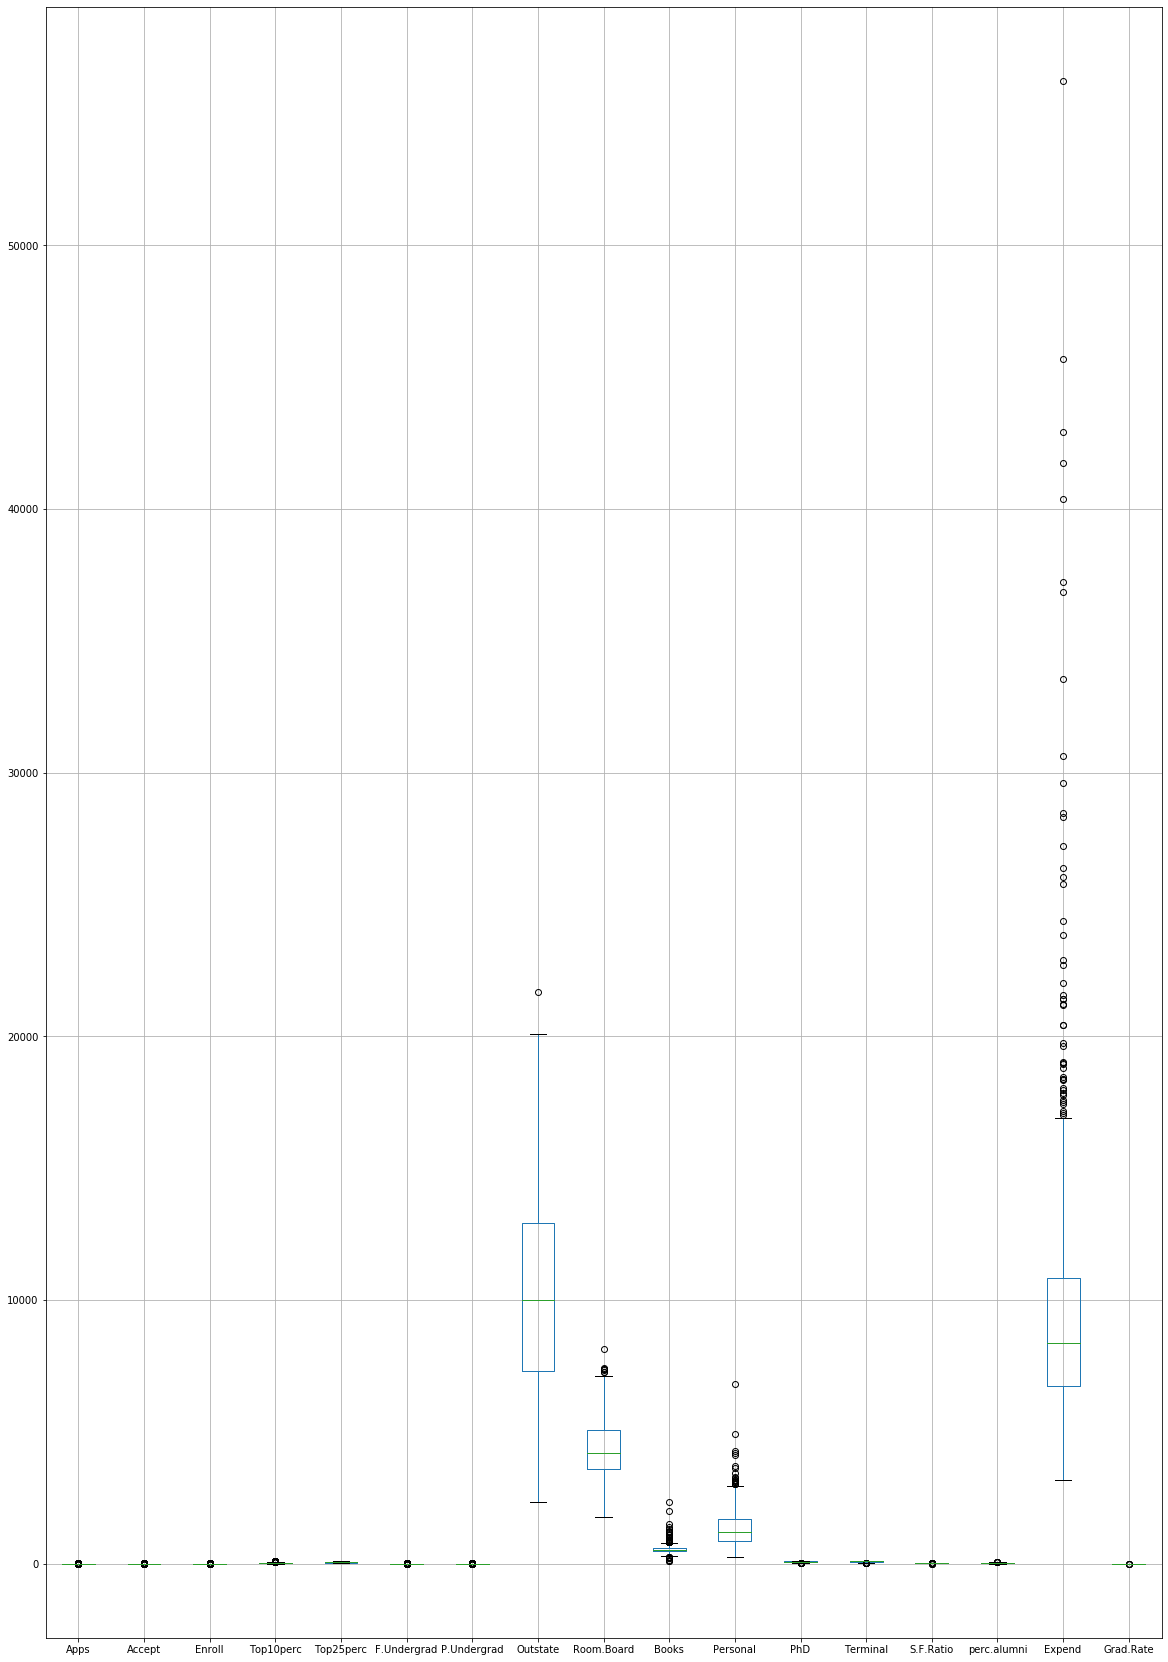

In [41]:
edu.boxplot(figsize=(20,30))

In [43]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


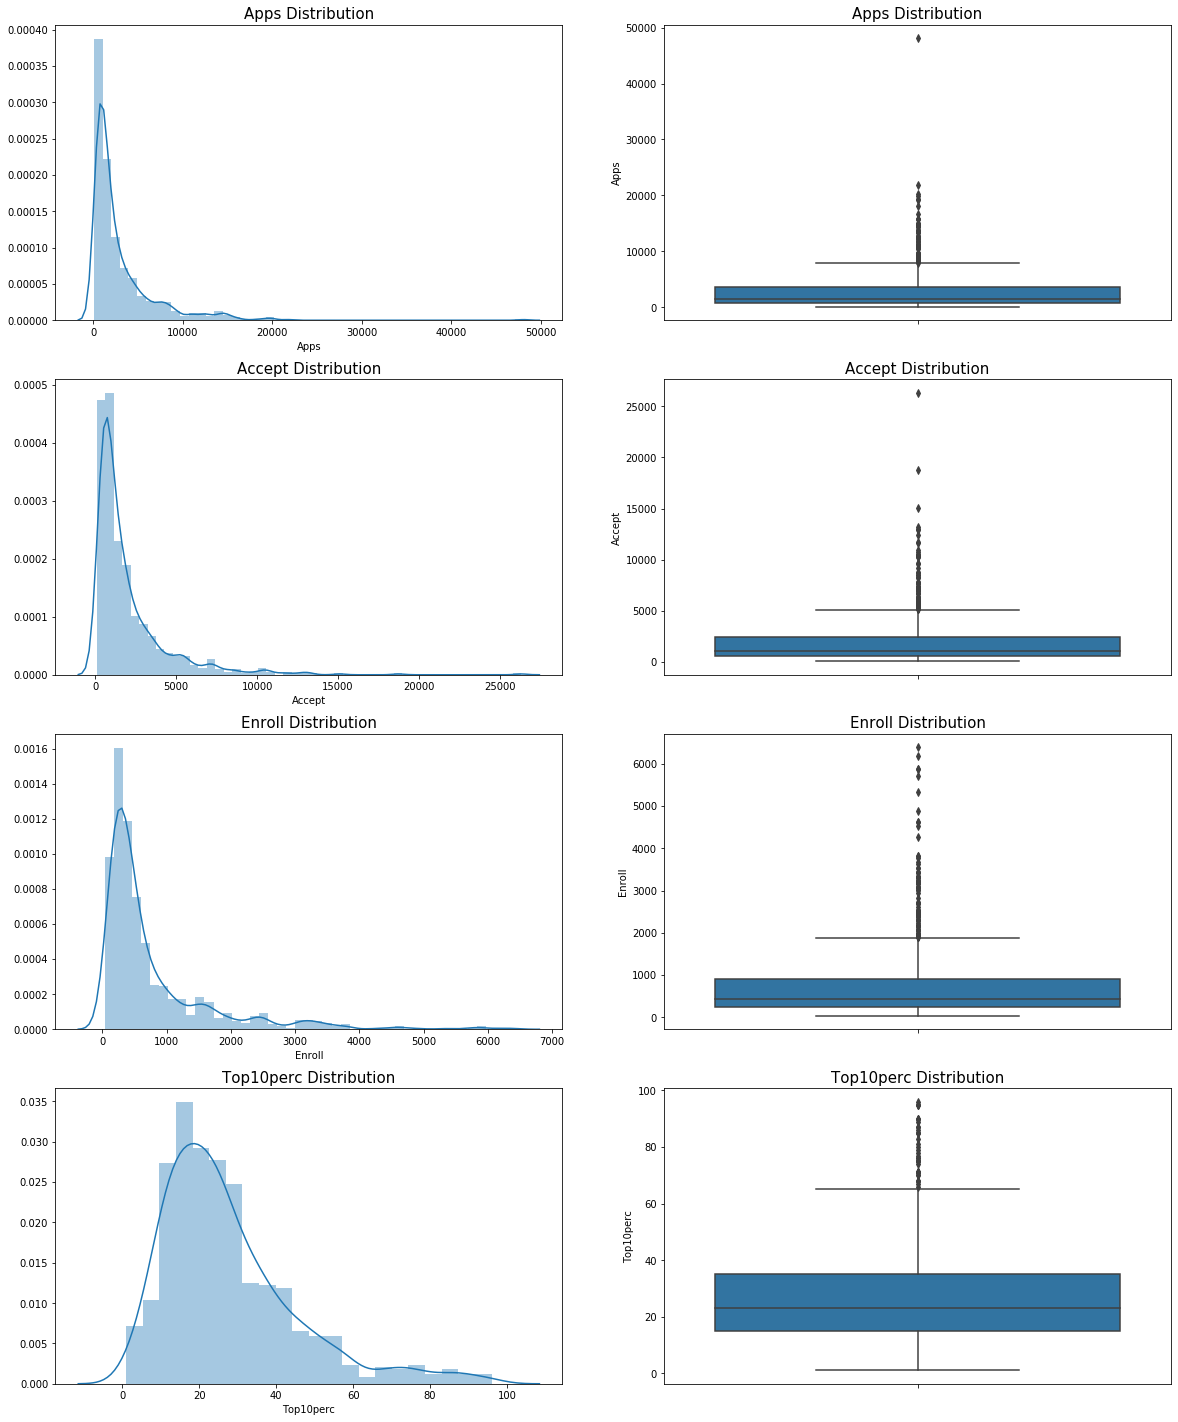

In [49]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 25)
a = sns.distplot(edu['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=15)
a = sns.boxplot(edu['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(edu['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=15)

a = sns.boxplot(edu['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=15)

a = sns.distplot(edu['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=15)

a = sns.boxplot(edu['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)


a = sns.distplot(edu['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=15)

a = sns.boxplot(edu['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=15)

plt.show()

In [50]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


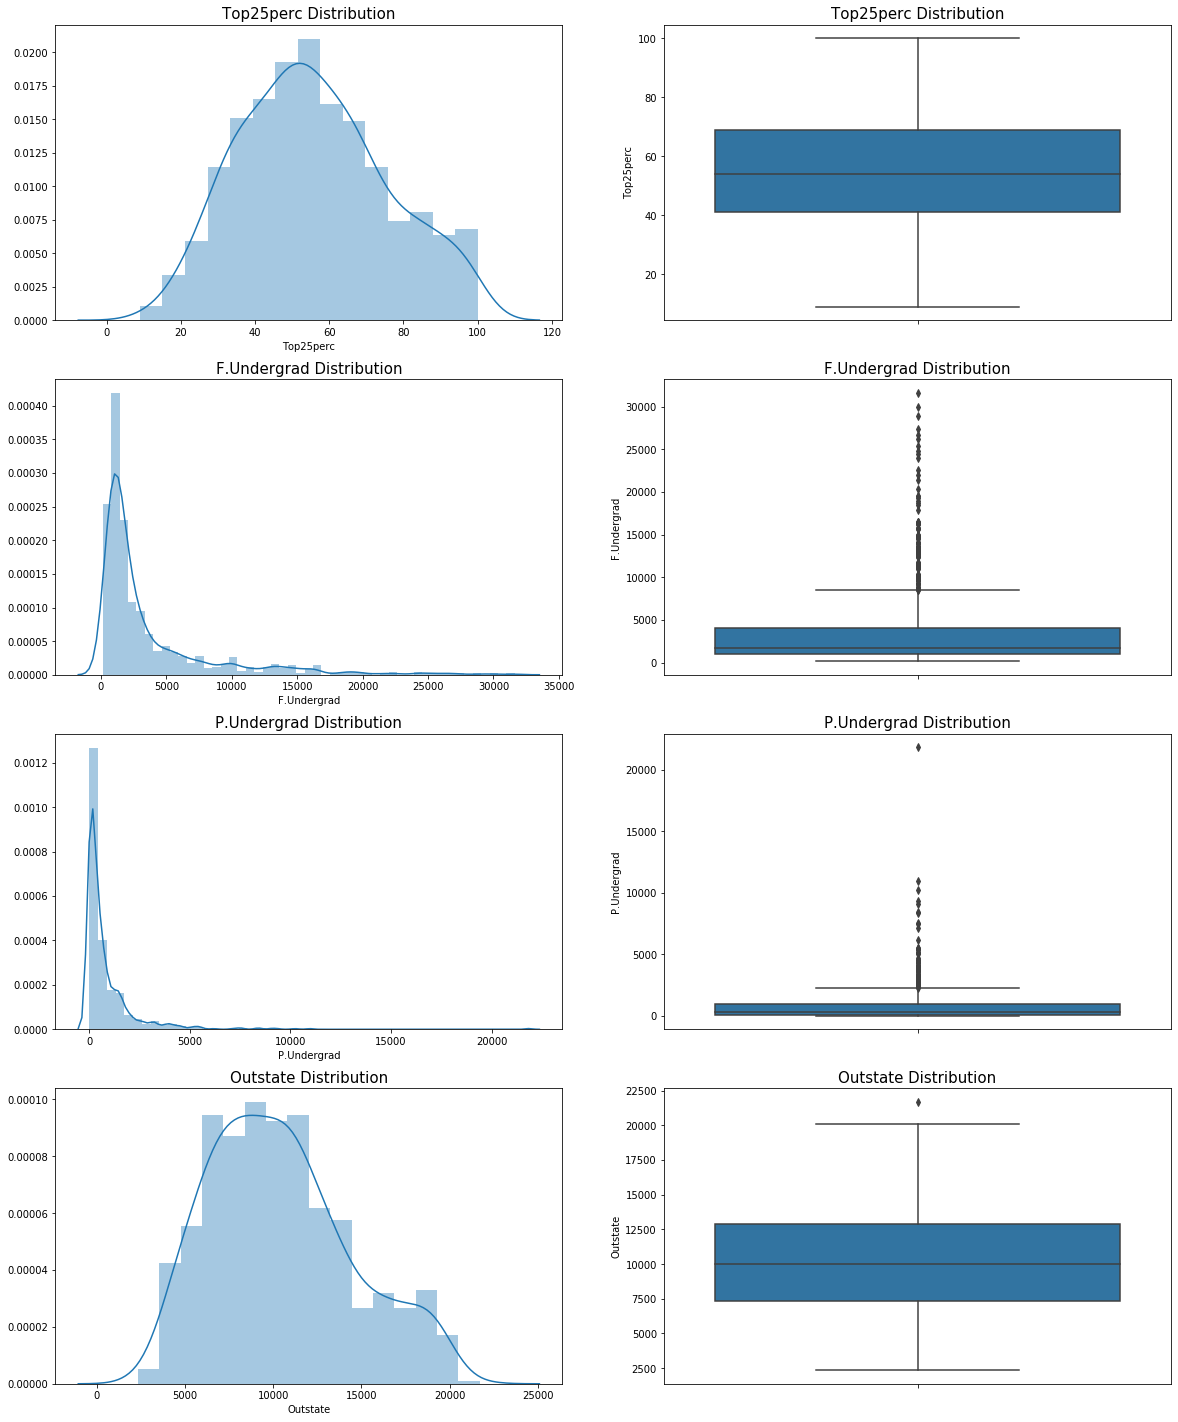

In [51]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 25)
a = sns.distplot(edu['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=15)
a = sns.boxplot(edu['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(edu['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.boxplot(edu['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=15)

a = sns.distplot(edu['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=15)

a = sns.boxplot(edu['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=15)


a = sns.distplot(edu['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=15)

a = sns.boxplot(edu['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=15)

plt.show()

In [52]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


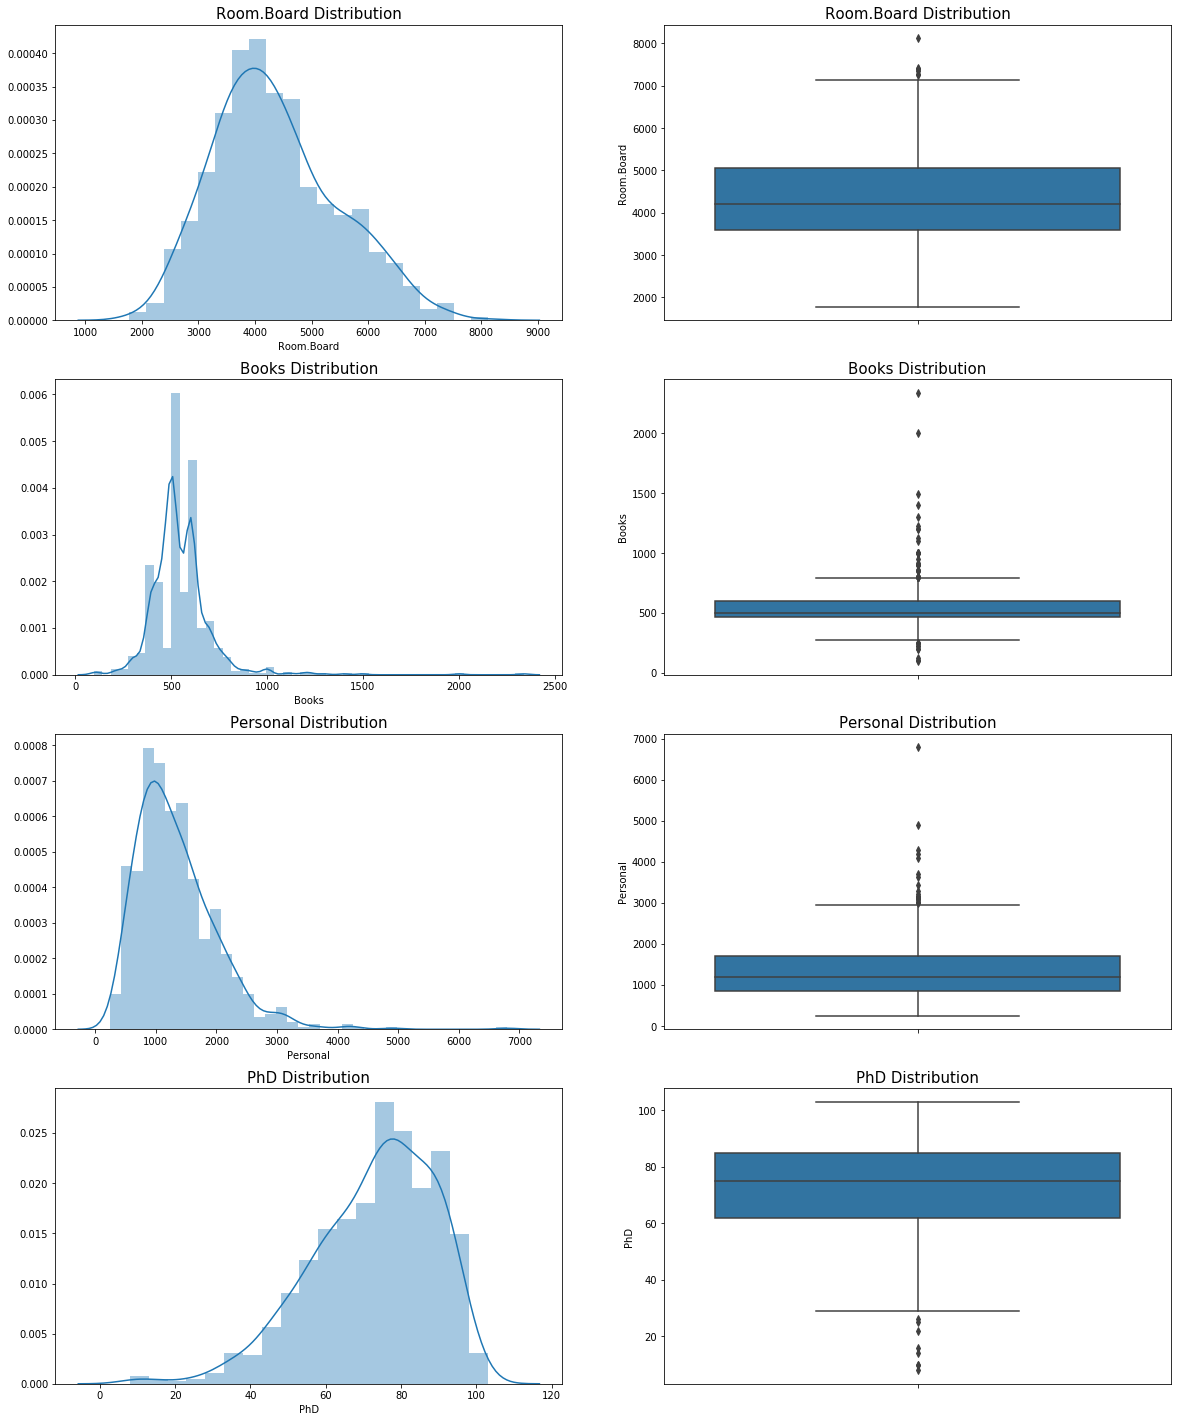

In [53]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 25)
a = sns.distplot(edu['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=15)
a = sns.boxplot(edu['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(edu['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=15)

a = sns.boxplot(edu['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=15)

a = sns.distplot(edu['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=15)

a = sns.boxplot(edu['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=15)


a = sns.distplot(edu['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=15)

a = sns.boxplot(edu['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=15)

plt.show()

In [54]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


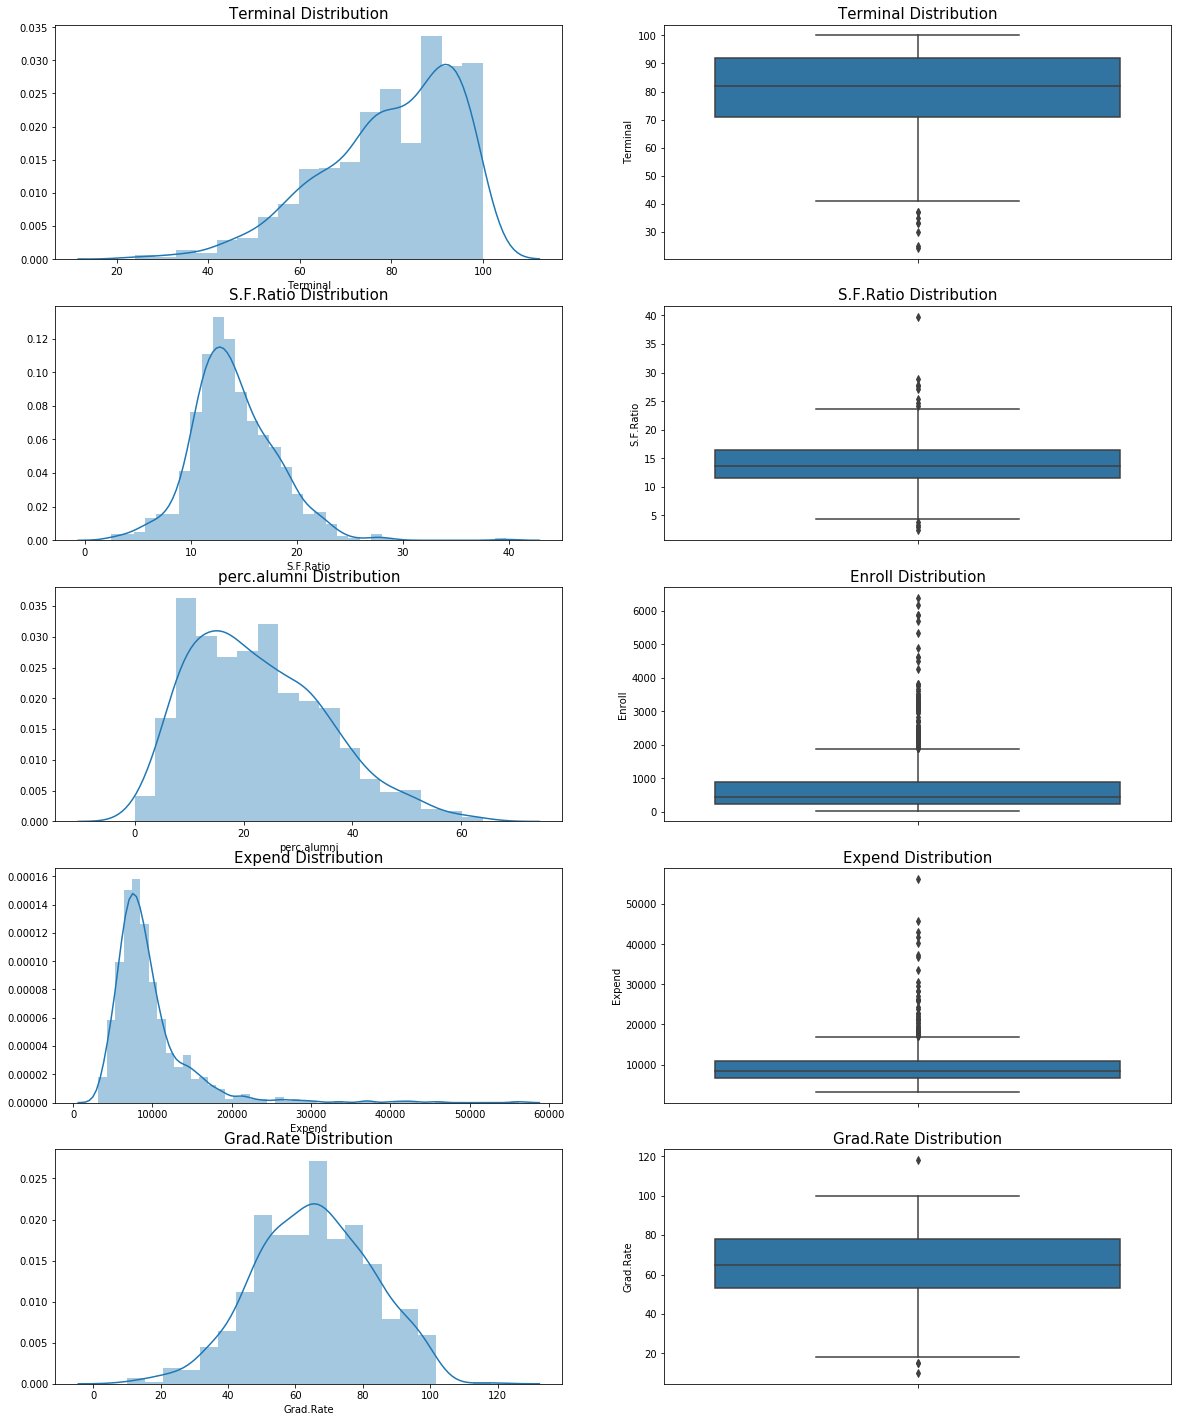

In [56]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 25)
a = sns.distplot(edu['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=15)
a = sns.boxplot(edu['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(edu['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.boxplot(edu['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=15)

a = sns.distplot(edu['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=15)

a = sns.boxplot(edu['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=15)


a = sns.distplot(edu['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=15)

a = sns.boxplot(edu['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=15)

a = sns.distplot(edu['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=15)

a = sns.boxplot(edu['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=15)

plt.show()

In [58]:
from scipy.stats import zscore


# fb.head()
edu= edu.drop(columns='Names')
data_new=edu.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [59]:

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [61]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]
Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6.9

In [62]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


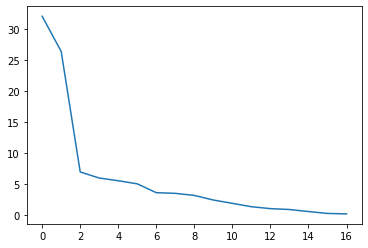

In [63]:
plt.plot(var_exp)

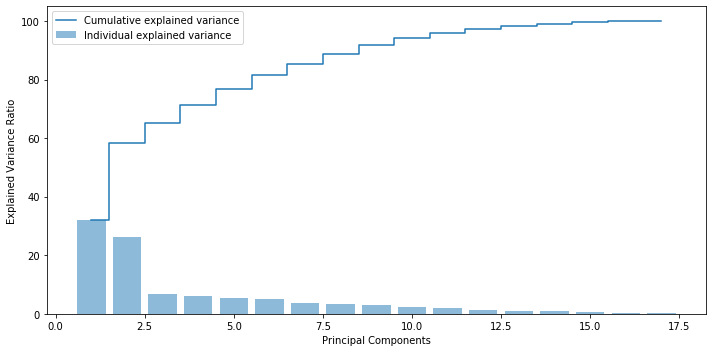

In [64]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [70]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829983e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073564e-01,  2.27879815e+00, -4.38092812e-01, ...,
        -4.05638365e-04,  2.07356364e+00, -1.32891516e+00],
       [-9.21749369e-01,  3.58891820e+00,  6.77240529e-01, ...,
         5.43162769e-02,  8.52054048e-01, -1.08022548e-01],
       [-7.43975234e-01,  1.05999640e+00, -3.69613267e-01, ...,
        -5.16021139e-01, -9.47754454e-01, -1.13217589e+00],
       [-2.98305925e-01, -1.77137500e-01, -9.60591682e-01, ...,
         4.68014228e-01, -2.06993710e+00,  8.39893135e-01]])

In [71]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139297,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781734,  0.16182678, -0.05154725, -0.10976654,
         0.10041233, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [72]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701])

In [73]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6])

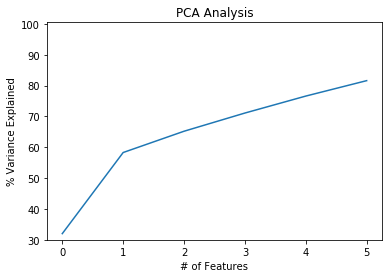

In [74]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [75]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268

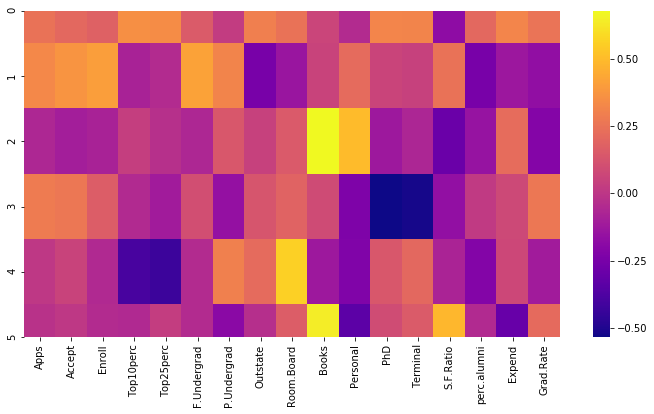

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)